In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from shapely import Polygon
from pyogrio.errors import DataSourceError

mpl.rcParams["svg.hashsalt"] = "42"

metadata = {
    "png": {"Author": "Gergő Pintér", "CreationDate": None, "Copyright": "CC BY 4.0"},
    "svg": {"Creator": "Gergő Pintér", "Date": None, "Rights": "CC BY 4.0"},
}

In [11]:
weeplace = pd.read_csv("../data/weeplace/weeplace_checkins.csv")
weeplace = gpd.GeoDataFrame(weeplace, geometry=gpd.points_from_xy(weeplace["lon"], weeplace["lat"]), crs=4326)

In [72]:
(27, 50.55)
(12, 43.55)
area_polygon = Polygon([(9, 43.615), (27, 43.615), (27, 50.5), (9, 50.5)])
area = gpd.GeoDataFrame(geometry=[area_polygon], crs=4326)
b = area.to_crs(3785).bounds

In [73]:
(b["maxx"][0] - b["minx"][0]) /( b["maxy"][0] - b["miny"][0])

np.float64(1.7775299432385228)

In [54]:
16/9

1.7777777777777777

In [74]:
data = weeplace[weeplace.geometry.within(area.geometry[0])].copy()

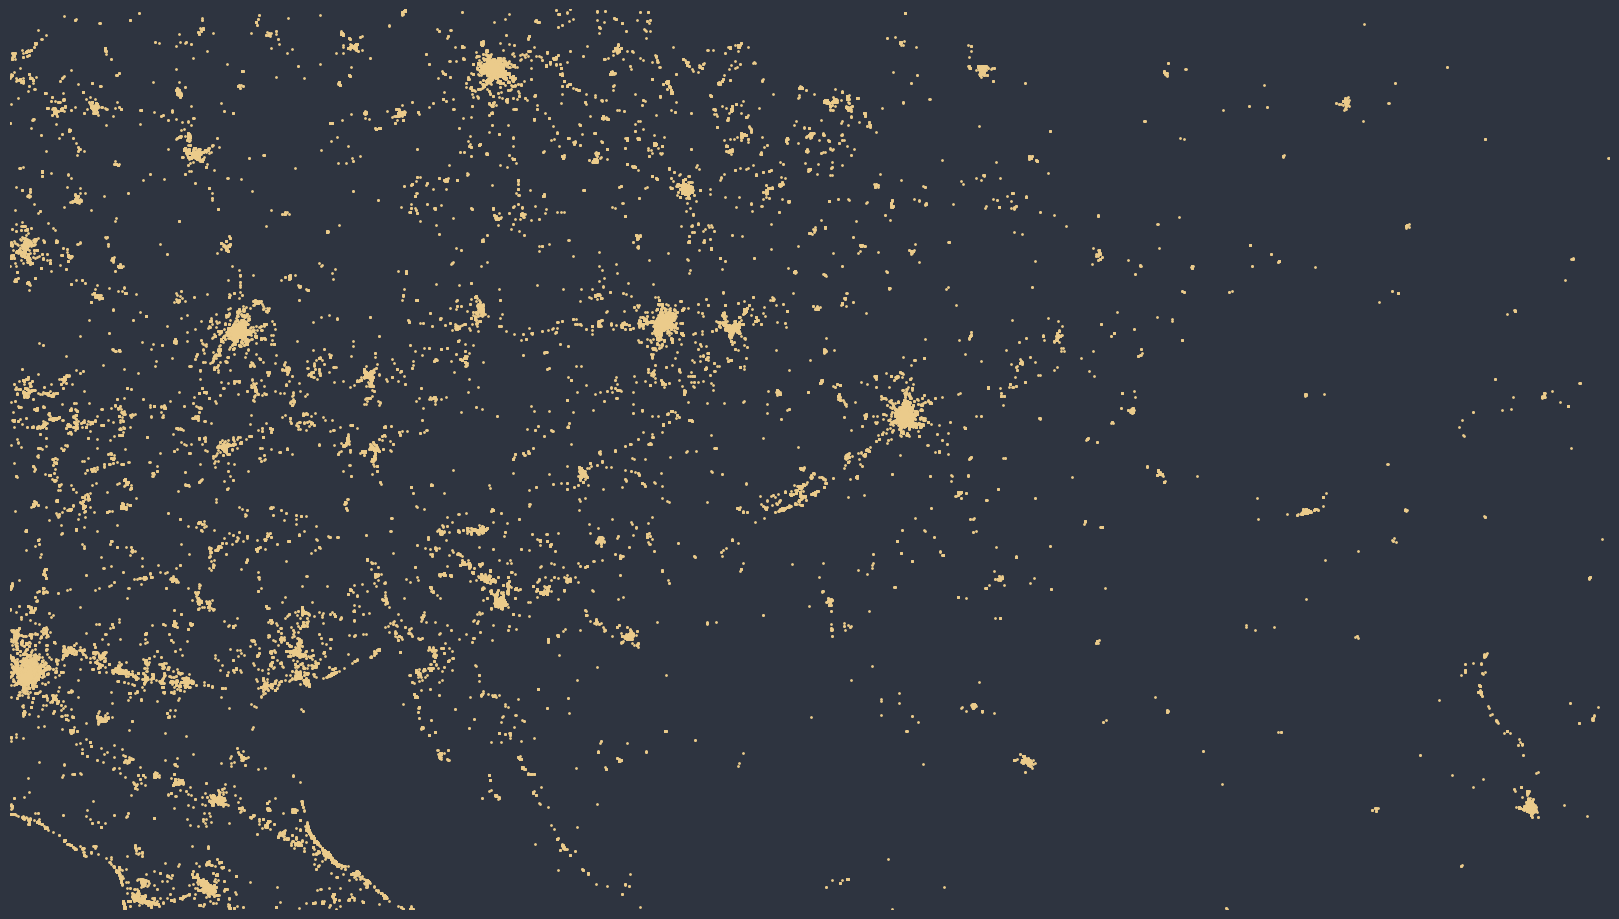

In [ ]:
fig = plt.figure(figsize=(16, 9), facecolor="#2e3440")
ax = fig.add_axes([0, 0, 1, 1], frameon=False, xticks=[], yticks=[])
ax.margins(0)
ax.axis("off")
data.to_crs(3785).plot(ax=ax, markersize=1, color="#ebcb8b")
for i in ["png", "svg"]:
    fig.savefig(f"../figures/central_europe.{i}", dpi=150, metadata=metadata[i], pad_inches=0)